In [1]:
import pymatgen as p
from pymatgen.io import ase
import re
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read,write
from gpaw import GPAW, PW, FermiDirac
from gpaw.unfold import Unfold, find_K_from_k
import os
import pymatgen as p
from pymatgen.io import ase
from gpaw import mpi
import re
import numpy as np
from ase.parallel import parprint
from pymatgen.io.cif import CifParser
import pickle

In [2]:
def get_ase(n=3,m=1):
    import pymatgen as p
    lco=p.core.Structure.from_file("small.cif")
    lco_sc=lco.copy()
    n=3
    sc=np.array([
        [n,0,0],
        [0,n,0],
        [0,0,n]
    ])
    lco_sc.make_supercell(sc)
    li=np.array([i if j.species_string=="Li" else -1 for i,j in enumerate(lco_sc)])
    li=li[li>=0]
    index = np.random.choice(li.shape[0], m, replace=False)  
    for i in index:
        lco_sc.replace(li[i],"H")
    percentage_li=lco_sc.composition.get_atomic_fraction("Li")/lco_sc.composition.get_atomic_fraction("Co")
    lco_sc.to("cif","lco_sc.cif")
    return ase.AseAtomsAdaptor().get_atoms(lco_sc),percentage_li
def get_data(fname='defects_bands/band_0.pickle'):
    with open(fname, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [3]:
parser = CifParser("small.cif")
lco = parser.get_structures()[0]

In [4]:
lco.replace(0,"H")
lco

Structure Summary
Lattice
    abc : 2.836012503313443 2.836012503313443 4.99271
 angles : 73.5 73.5 60.00000000000002
 volume : 32.85295834818345
      A : 1.2403166780777473 2.419875578309425 -0.8054710687132021
      B : 2.7192247565098757 -0.0 -0.8054710687132021
      C : -0.0 -0.0 -4.99271
PeriodicSite: H (1.9798, 1.2099, -3.3018) [0.5000, 0.5000, 0.5000]
PeriodicSite: Co (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: O (2.9284, 1.7897, -5.0919) [0.7396, 0.7396, 0.7812]
PeriodicSite: O (1.0311, 0.6302, -1.5117) [0.2604, 0.2604, 0.2188]

In [5]:
lco,percentage=get_ase(n=3,m=1)

In [4]:
print("percentage of defect concentration = {:.3f}".format(percentage))

percentage of defect concentration = 0.963


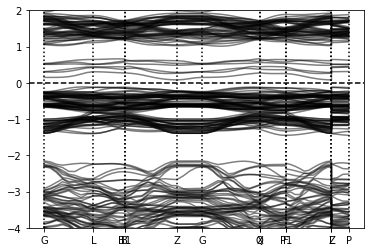

In [14]:
data=get_data(fname="defects_bands/band_0.94.pickle")

x=data['path'].get_linear_kpoint_axis()[0]
y=data['energies'][0].T-data['reference']
fig,ax=plt.subplots()

for i in y:
    ax.plot(x,i,c="k",alpha=0.5)
for i in data['path'].get_linear_kpoint_axis()[1]:
    ax.axvline(i,c="k",ls=":")
ax.set_xticks(data['path'].get_linear_kpoint_axis()[1])
ax.set_xticklabels(data['path'].get_linear_kpoint_axis()[2])
ax.set_ylim([-4,2])

ax.axhline(0,c="k",ls="--")


plt.show()

In [8]:
bp = lco.cell.bandpath("LGX",npoints=90)
x, X, name = bp.get_linear_kpoint_axis()

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
lco.cell.bandpath("LGX").path

'LGX'

In [39]:
bp = lco.cell.bandpath(npoints=48)
x, X, name = bp.get_linear_kpoint_axis()

n=3
M=np.array([
        [n,0,0],
        [0,n,0],
        [0,0,n]
    ])

Kpts = []
for k in bp.kpts:
    K = find_K_from_k(k, M)[0]
    Kpts.append(K)

In [40]:
bp.kpts

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.07142857,  0.        ,  0.        ],
       [ 0.14285714,  0.        ,  0.        ],
       [ 0.21428571,  0.        ,  0.        ],
       [ 0.28571429,  0.        ,  0.        ],
       [ 0.35714286,  0.        ,  0.        ],
       [ 0.42857143,  0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.        ],
       [ 0.5       ,  0.04668811, -0.04668811],
       [ 0.5       ,  0.09337622, -0.09337622],
       [ 0.5       ,  0.14006433, -0.14006433],
       [ 0.5       ,  0.18675244, -0.18675244],
       [ 0.81324756,  0.5       ,  0.18675244],
       [ 0.76849791,  0.5       ,  0.23150209],
       [ 0.72374825,  0.5       ,  0.27625175],
       [ 0.6789986 ,  0.5       ,  0.3210014 ],
       [ 0.63424895,  0.5       ,  0.36575105],
       [ 0.5894993 ,  0.5       ,  0.4105007 ],
       [ 0.54474965,  0.5       ,  0.45525035],
       [ 0.5       ,  0.5       ,  0.5       ],
       [ 0.33333333,  0.33333333,  0.333

Plotting Spectral Function


(0.0, 0.6846911873409032, -3.0, 3.0)

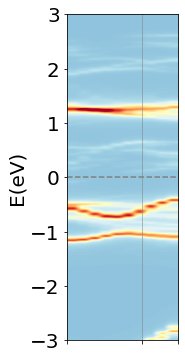

In [52]:

from gpaw.unfold import plot_spectral_function

data=get_data(fname="defects_bands/band_0.94.pickle")
eref=data['reference']
emin=-3
emax=3


try:
    e, A_ke, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defects' + '.pckl',
                                                  'rb'))
except IOError:
    print('You Need to Calculate the SF first!')
    raise SystemExit()

    
    
    
# e, A_ke1, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_0' + '.pckl',
#                                                   'rb'))
# e, A_ke2, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_1' + '.pckl',
#                                                 'rb'))
# e, A_ke3, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_2' + '.pckl',
#                                                 'rb'))
# e, A_ke4, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_3' + '.pckl',
#                                                 'rb'))
# e, A_ke5, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_4' + '.pckl',
#                                                 'rb'))
# e, A_ke6, x, X, points_name = pickle.load(open('defects_bands/sf_3x3_defect_5' + '.pckl',
#                                                 'rb'))

# A_ke=np.concatenate((A_ke1,A_ke2,A_ke3,A_ke4,A_ke5,A_ke6))
A_ke /= np.max(A_ke)
A_ek = A_ke.T
A_ekc = np.reshape(A_ek, (A_ek.shape[0], A_ek.shape[1]))    
    
    

import matplotlib.pyplot as plt
print('Plotting Spectral Function')

if eref is not None:
    e -= eref
if emin is None:
    emin = e.min()
if emax is None:
    emax = e.max()

A_ke /= np.max(A_ke)
A_ek = A_ke.T
A_ekc = np.reshape(A_ek, (A_ek.shape[0], A_ek.shape[1]))

# mycmap = make_colormap(color)

fig,ax=plt.subplots(figsize=(2,6))

plt.plot([0, x[-1]], 2 * [0.0], '--', c='0.5')
plt.imshow(A_ekc + 0.25,
           cmap="RdYlBu_r",
           aspect='auto',
           origin='lower',
           vmin=0.,
           vmax=1,
           extent=[0, x[-1], e.min(), e.max()])

for k in X[1:-1]:
    plt.plot([k, k], [emin, emax], lw=0.5, c='0.5')
plt.xticks(X, points_name, size=20)
plt.yticks(size=20)
plt.ylabel('E(eV)', size=20)
plt.axis([0, x[-1], emin, emax])




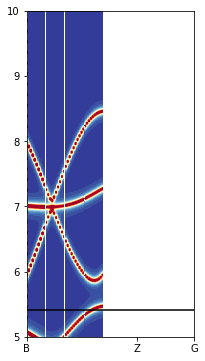

In [21]:
fname=[0,1,2,3]
fig,ax=plt.subplots(figsize=(3,6))
kx=0
def get_bandfile(fname):
        import os
        import re

        rootdir = fname
        regex = re.compile('(.*pickle$)|(.*rar$)|(.*r01$)')

        for root, dirs, files in os.walk(rootdir):
            for file in files:
                if regex.match(file):
                    return file
data=get_data(fname='../defects_final/0.000/'+get_bandfile(fname='../defects_final/0.000/'))
eref=data['reference']
scale=[0.0,0.17,0.15,0.18,0.,0]
for j,i in enumerate(fname):
    e, A_ke, x1, X, points_name = pickle.load(open('../defects_final/0.000/sf_3x3_defect_{}.pckl'.format(i),
                                                  'rb'))  
    
    A_ke /= np.max(A_ke)
    A_ek = A_ke.T
    A_ekc = np.reshape(A_ek, (A_ek.shape[0], A_ek.shape[1]))
    x=[]
    for l in range(A_ekc.shape[1]):
        x.append(kx)
        kx=kx+np.diff(x1)[0]
    x=np.array(x)-j*np.diff(x1)[0]*scale[j]
    plt.contourf(x,
                np.linspace(e.min(),e.max(),A_ekc.shape[0]),
                A_ekc,
                90,
                cmap="RdYlBu_r",
                vmin=0,
                vmax=.5,)

bp = lco.cell.bandpath("BZG",npoints=90)
x, X, name = bp.get_linear_kpoint_axis()
x-=np.diff(x)[0]*(len(X)+1)
X=np.array(X)-np.diff(x)[0]*(len(X)+1)
X[0]=0
ax.set_xticks(X)
ax.set_xticklabels(name)
for i in X:ax.axvline(i,c="w",ls="--",lw=2)
plt.xlim(0,x.max())
plt.ylim([5,10])
plt.axhline(eref,c="k")
plt.show()

In [26]:
def plot_spectrum(fname='../defects_final/0.630/',ax=None,scale=[0.0,0.2,0.21,0.22,0.23,0],eref=None):
    
    def get_bandfile(fname):
        import os
        import re

        rootdir = fname
        regex = re.compile('(.*pickle$)|(.*rar$)|(.*r01$)')

        for root, dirs, files in os.walk(rootdir):
            for file in files:
                if regex.match(file):
                    return file
    
    
    
    part_fname=range(20)
    kx=0
    lab=[]
    if eref==None:
        data=get_data(fname=fname+get_bandfile(fname))
        eref=data['reference']
    for j,i in enumerate(part_fname):
        try:
            e, A_ke, x1, X, points_name = pickle.load(open(fname+'sf_3x3_defect_{}.pckl'.format(i),
                                                          'rb'))  

            A_ke /= np.max(A_ke)
            A_ek = A_ke.T
            A_ekc = np.reshape(A_ek, (A_ek.shape[0], A_ek.shape[1]))
            x=[]
            for l in range(A_ekc.shape[1]):
                x.append(kx)
                kx=kx+np.diff(x1)[0]
            x=np.array(x)-j*np.diff(x1)[0]*scale[j]
            ax.contourf(x,
                        np.linspace(e.min(),e.max(),A_ekc.shape[0]),
                        A_ekc,
                        90,
                        cmap="hot",
#                         cmap="afmhot",
                        vmin=0,
                        vmax=0.5,)
        except:None

    bp = lco.cell.bandpath("BZG",npoints=90)
    x, X, name = bp.get_linear_kpoint_axis()
    x-=np.diff(x)[0]*(len(X)+1)
    X=np.array(X)-np.diff(x)[0]*(len(X)+1)
    X[0]=0
    ax.set_xticks(X)
    ax.set_xticklabels(name)
    for i in X:ax.axvline(i,c="w",ls="--",lw=2)
    ax.set_xlim(0,x.max())
    ax.set_ylim([eref-4,eref+4])
    ax.set_yticklabels(np.linspace(eref-4,eref+4,3))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(['{:.2f}'.format(i) for i in np.linspace(-4,+4,len(labels))])
    ax.axhline(eref,c="w")

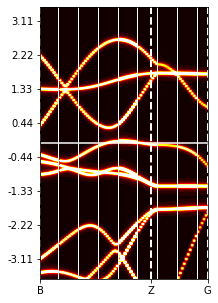

In [27]:
n=1
fig,ax1=plt.subplots(1,n,figsize=(3*n,5))


ax=ax1
plot_spectrum('../defects_final/0.000/',ax,scale=[0,0,0,0,0,0,0,0,0])
plt.show()